# Импорт

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib
import json
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, Bidirectional, LSTM, Activation, Embedding
from keras import *
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [2]:
from nltk.stem.porter import *
import random
import copy

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def removeStopWords(lowerArg):
    removed=[]
    for x in lowerArg:
        removed.append((' '.join([word for word in x.split() if word not in nltk.corpus.stopwords.words('english')])))
    cleaned_line = pd.Series(removed).astype(str)
    return cleaned_line

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ИТМО/NLP/wiki_movie_plots_deduped.csv')
newsdf = pd.read_json('/content/drive/MyDrive/ИТМО/NLP/News_Category_Dataset_v2.json', lines=True, dtype='str')

In [7]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


In [8]:
newsdf

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


# EDA Movie Data


In [6]:
genres = ['drama','comedy']

df = df[df['Genre'].isin(genres)]
df = df.reset_index()
df['GenreID'] = df['Genre'].apply(lambda x: genres.index(x))

word_сnt = df['Plot'].apply(lambda x: x.count(' '))
print(f'Среднее кол-во слов в синопсисе: {int(word_сnt.mean())}')
print(f'Стандартное отклонение кол-ва слов в синопсисе: {int(word_сnt.std())}')
print(f'Кол-во записей, где жанр - "Драма": {df.Genre.value_counts()[0]}')
print(f'Кол-во записей, где жанр - "Комедия": {df.Genre.value_counts()[1]}')

Среднее кол-во слов в синопсисе: 334
Стандартное отклонение кол-ва слов в синопсисе: 285
Кол-во записей, где жанр - "Драма": 5964
Кол-во записей, где жанр - "Комедия": 4379


Гистограмма распределение кол-ва слов в синопсисе


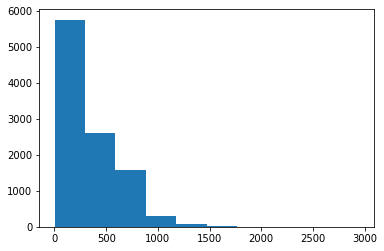

In [7]:
matplotlib.pyplot.hist(word_сnt)
print('Гистограмма распределение кол-ва слов в синопсисе')

In [8]:
syn_number = random.randint(0,len(df))
print(f'Название: {df.Title.loc[syn_number]}')
print(f'Жанр: {df.Genre.loc[syn_number]}\n')
print(f'Синопсис:\n{df.Plot.loc[syn_number]}')

Название: The Legend of Billie Jean
Жанр: drama

Синопсис:
Billie Jean Davy, a teenager in Corpus Christi, Texas, rides with her younger brother, Binx on his Honda Elite 80 to a local lake to go swimming. At a drive-in, Hubie Pyatt, a rowdy local teen, and his friends hit on Billie Jean, but Binx humiliates him by throwing a milkshake in his face. Later, as Billie Jean tells Binx about the weather in Vermont, a place he has always wanted to visit, Hubie steals Binx's scooter.
As Binx goes to retrieve his scooter later that night, Billie Jean goes to the police with her friends Putter and Ophelia. Detective Ringwald is sympathetic, but urges them to wait the problem out. When Billie Jean returns home, she finds Binx beaten, and his scooter severely damaged. The next day, Billie Jean, Binx, and Ophelia go to Mr. Pyatt's shop to get the money to repair the scooter. While initially appearing helpful and understanding, Mr. Pyatt then propositions Billie Jean and then attempts to rape her.
M

1. # EDA News Dataset

In [9]:
newsdf['Comedy'] = (newsdf['category']=='COMEDY')
news = pd.concat([newsdf[newsdf['Comedy']==False].sample(5000), newsdf[newsdf['Comedy']]], axis=0)
print(f'Новости по теме "Комедия": {news.Comedy.value_counts().values[0]}')
print(f'Новости по другим темам: {news.Comedy.value_counts().values[1]}\n')

wordCountNews = newsdf['short_description'].apply(lambda x: x.count(' '))
wordCountHeadline = newsdf['headline'].apply(lambda x: x.count(' '))

print(f"Среднее кол-во слов в синопсисе: {int(wordCountNews.mean())}")
print(f"Стандартное отклонение кол-ва слов в синопсисе: {int(wordCountNews.std())}\n")
print(f"Среднее кол-во слов в заголовке: {int(wordCountHeadline.mean())}")
print(f"Стандартное отклонение кол-ва слов в заголовке: {int(wordCountHeadline.std())}")

Новости по теме "Комедия": 5175
Новости по другим темам: 5000

Среднее кол-во слов в синопсисе: 18
Стандартное отклонение кол-ва слов в синопсисе: 14

Среднее кол-во слов в заголовке: 8
Стандартное отклонение кол-ва слов в заголовке: 3


# Обработка текста и векторизация


In [10]:
news = news.reset_index()
news['Text'] = news['short_description'].str.cat(news['headline'])
news['OriginalText'] = news['Text']

In [13]:
%%time

stemmer = PorterStemmer()
df['StemmedPlot'] = df['Plot'].str.split().apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))

CPU times: user 1min 3s, sys: 77 ms, total: 1min 3s
Wall time: 1min 3s


In [14]:
%%time

lower = news['Text'].str.lower()
noStops = removeStopWords(lower)
news['Text'] = noStops
df['OriginalPlot'] = df['Plot']
lower = df['Plot'].str.lower()
cleaned = removeStopWords(lower)
df['Plot'] = cleaned

CPU times: user 5min 45s, sys: 45.4 s, total: 6min 30s
Wall time: 6min 32s


In [15]:
df

,index,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,GenreID,StemmedPlot,OriginalPlot
0,7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,"film family move suburbs, hoping quiet life. t...",1,the film is about a famili who move to the sub...,The film is about a family who move to the sub...
1,14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,"heading baseball game nearby ballpark, sports ...",1,befor head out to a basebal game at a nearbi b...,Before heading out to a baseball game at a nea...
2,15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,plot black woman going dentist toothache given...,1,the plot is that of a black woman go to the de...,The plot is that of a black woman going to the...
3,16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,beautiful summer day father mother take daught...,0,on a beauti summer day a father and mother tak...,On a beautiful summer day a father and mother ...
4,17,1908,The Black Viper,American,D. W. Griffith,D. W. Griffith,drama,https://en.wikipedia.org/wiki/The_Black_Viper,thug accosts girl leaves workplace man rescues...,0,a thug accost a girl as she leav her workplac ...,A thug accosts a girl as she leaves her workpl...
...,...,...,...,...,...,...,...,...,...,...,...,...
10338,34874,2011,White as Snow,Turkish,Selim Güneş,"Hakan Korkmaz, Sinem İslamoğlu & Gürkan Piri O...",drama,https://en.wikipedia.org/wiki/White_as_Snow_(f...,hasan twelve-year-old boy living two younger s...,0,hasan is a twelve-year-old boy live with hi tw...,Hasan is a twelve-year-old boy living with his...
10339,34875,2011,Once Upon a Time in Anatolia,Turkish,Nuri Bilge Ceylan,"Yılmaz Erdoğan, Taner Birsel & Ufuk Karaali",drama,https://en.wikipedia.org/wiki/Once_Upon_a_Time...,"night, three cars carry small group men – poli...",0,"through the night, three car carri a small gro...","Through the night, three cars carry a small gr..."
10340,34876,2013,Selam,Turkish,Levent Demirkale,"Bucin Abdullah, Selma Alispahic, Tina Cvitanov...",drama,https://en.wikipedia.org/wiki/Selam_(film),film opens senegalese boy named khadim told li...,0,the film open with a senegales boy name khadim...,The film opens with a Senegalese boy named Kha...
10341,34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"two musicians, salih gürkan, described adventu...",1,"two musicians, salih and gürkan, describ the a...","Two musicians, Salih and Gürkan, described the..."


In [16]:
%%time

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(df['Plot']))
sequences = tokenizer.texts_to_sequences(list(df['Plot']))
max_len = np.max([len(sequence) for sequence in sequences])
print(f"Максимальная длина синопсиса: {max_len}")
word_index = tokenizer.word_index
print(f'Найдено {len(word_index)} уникальных токенов.')
data = pad_sequences(sequences, maxlen=max_len)

print(f'Размерность данных: {data.shape}')

Максимальная длина синопсиса: 1536
Найдено 81642 уникальных токенов.
Размерность данных: (10343, 1536)
CPU times: user 4.84 s, sys: 21.4 ms, total: 4.86 s
Wall time: 4.91 s


In [137]:
sequences

[[22,
  15,
  293,
  7304,
  808,
  1843,
  13,
  274,
  250,
  25,
  669,
  21,
  33,
  1501,
  140,
  2085,
  33743,
  571,
  659],
 [2800,
  1578,
  203,
  619,
  21862,
  2661,
  2393,
  148,
  1231,
  1768,
  189,
  51066,
  16708,
  96,
  21862,
  759,
  203,
  80,
  5985,
  203,
  362,
  6698,
  1392,
  490,
  13242,
  9537,
  1578,
  1261,
  3,
  33744,
  290,
  203,
  743,
  148,
  1231,
  6809,
  5,
  1,
  50,
  249,
  9788,
  17,
  860,
  21,
  38,
  975,
  40,
  1502,
  2471,
  2394,
  2,
  655,
  1073,
  1393,
  3291,
  21863,
  402],
 [544,
  318,
  56,
  136,
  5986,
  21864,
  311,
  3263,
  1439,
  57,
  1039,
  5,
  3965,
  706,
  240,
  3263,
  252,
  69,
  783,
  6914,
  7,
  202,
  7305,
  30,
  920],
 [514,
  1054,
  20,
  4,
  18,
  32,
  45,
  23723,
  7917,
  815,
  18,
  106,
  517,
  33745,
  33746,
  3734,
  43,
  1045,
  18,
  4,
  542,
  322,
  3734,
  58,
  506,
  5890,
  157,
  77,
  1891,
  23723,
  118,
  2784,
  602,
  497,
  4838,
  3734,
  29,
  237

In [17]:
%%time

news_tokenizer = Tokenizer()
news_tokenizer.fit_on_texts(list(news['Text']))
news_seqs = news_tokenizer.texts_to_sequences(list(news['Text']))
newsword_index = news_tokenizer.word_index
print(f'Найдено {len(newsword_index)} уникальных токенов.')
news_data = pad_sequences(news_seqs, maxlen=max_len)
print(f'Размерность НОВОСТНЫХ данных: {news_data.shape}')

Найдено 27767 уникальных токенов.
Размерность НОВОСТНЫХ данных: (10175, 1536)
CPU times: user 588 ms, sys: 4.79 ms, total: 593 ms
Wall time: 597 ms


In [24]:
syn_number = random.randint(0,len(sequences))

word_indx_rev = {v: k for k, v in tokenizer.word_index.items()}
print(sequences[syn_number])
print(' '.join([word_indx_rev[wrd_indx] for wrd_indx in sequences[syn_number]]))
print(data[syn_number][0],'\n',data[syn_number][-1])
print(' '.join([word_indx_rev[wrd_indx] for wrd_indx in data[syn_number] if wrd_indx!=0]))

[78217, 146, 18278, 3320, 1781, 204, 6569, 39697, 238, 981, 78218, 1902, 30, 4771, 17623, 16833, 1746, 225, 664, 71, 2647, 4754, 1946, 882, 7693, 13, 2063]
thathwamasi group pilgrims travelling border village kerala sabarimala visit lord ayyappas temple police constable vineeth atheist duty there joins them unexpected incidents happen journey transform life forever
0 
 2063
thathwamasi group pilgrims travelling border village kerala sabarimala visit lord ayyappas temple police constable vineeth atheist duty there joins them unexpected incidents happen journey transform life forever


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, df['GenreID'], test_size=.2, random_state=42)
testIndices = y_test.index
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train_small = y_train.copy()
X_train_small = X_train.copy()

y_train_add = to_categorical(news['Comedy'])
X_train_add = news_data
X_train = np.concatenate([X_train,X_train_add],axis=0)
y_train = np.concatenate([y_train, y_train_add],axis=0)

# GloVE

In [27]:
dict_embs={}
path = '/content/drive/MyDrive/ИТМО/NLP/glove.6B.100d.txt'
with open(path) as file:
    for embeddingLine in file:
        line_split, line_key  = embeddingLine.split()[1:], embeddingLine.split()[0]
        coefs = np.asarray(line_split, dtype='float32')
        dict_embs[line_key] = coefs

In [28]:
emb_mtrx = np.zeros((len(word_index)+1, 100))
for word, i in word_index.items():
    if word in dict_embs:
        emb_mtrx[i] = dict_embs[word]

In [34]:
indx = random.randint(1,81642)

word = word_indx_rev[indx]
print(f"Слово #{indx}: {word}")
print(f"Индекс слова '{word}': {word_index[word]}")
print(f"Эмбединг в списке: {dict_embs[word][:5]} . . .")
print(f"Эмбединг в матрице: {emb_mtrx[indx][:5]} . . .")

Слово #26795: hairdressing
Индекс слова 'hairdressing': 26795
Эмбединг в списке: [ 0.60802   0.087012 -0.69803   0.47699  -0.17558 ] . . .
Эмбединг в матрице: [ 0.60802001  0.087012   -0.69802999  0.47699001 -0.17557999] . . .


In [35]:
layer_emb = Embedding(len(word_index) + 1, 100,
                      weights=[emb_mtrx],
                      input_length=max_len,
                      trainable=False)

layer_emb_gloveoff = Embedding(len(word_index) + 1, 100,
                               weights=[emb_mtrx],
                               input_length=max_len)

In [38]:
seq_input = Input(shape=(max_len,), dtype='int32')
seq_emb = layer_emb(seq_input)
model_just_emb = Model(seq_input, seq_emb)

print(f'Результаты эмбединга в ручную:\n{[list(dict_embs[word_indx_rev[x]][:3]) if word_indx_rev[x] in dict_embs else [0,0,0] for x in sequences[500]][-5:]}')
print(f'Результаты эмбединга модели:\n{model_just_emb.predict(np.array(data[500]).reshape(1,max_len))[0,-5:,:3]}')

Результаты эмбединга в ручную:
[[0.45009, 0.16062, 0.11566], [-0.53849, 0.55165, 0.55302], [0.002042, 0.23462, 0.56775], [-0.11619, 0.45447, -0.69216], [-0.18572, 0.30092, 0.36868]]
1/1 [==============================] - 0s 38ms/step
Результаты эмбединга модели:
[[ 0.45009   0.16062   0.11566 ]
 [-0.53849   0.55165   0.55302 ]
 [ 0.002042  0.23462   0.56775 ]
 [-0.11619   0.45447  -0.69216 ]
 [-0.18572   0.30092   0.36868 ]]


# Модель CNN

In [47]:
def noGlove_model_train(epochs, batch):
  sequence_input = Input(shape=(max_len,), dtype='int32')
  embedded_sequences = layer_emb_gloveoff(sequence_input)
  x = Conv1D(128, 9, activation='relu')(embedded_sequences)
  x = MaxPooling1D(9)(x)
  x = Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x = MaxPooling1D(9)(x)
  x = Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x = MaxPooling1D(9)(x)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(len(genres), activation='softmax')(x)

  noGloveCNN = Model(sequence_input, x)
  noGloveCNN.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  
  noGloveCNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch)

  return noGloveCNN

In [56]:
EPOCH, BATCH = 10, 128
noGloveCNN = noGlove_model_train(EPOCH, BATCH)

Epoch 1/10
145/145 [==============================] - 9s 58ms/step - loss: 0.5741 - acc: 0.6124 - val_loss: 0.9062 - val_acc: 0.6762
Epoch 2/10
145/145 [==============================] - 8s 56ms/step - loss: 0.4844 - acc: 0.6551 - val_loss: 1.4213 - val_acc: 0.6438
Epoch 3/10
145/145 [==============================] - 9s 63ms/step - loss: 0.4915 - acc: 0.6576 - val_loss: 0.9738 - val_acc: 0.7061
Epoch 4/10
145/145 [==============================] - 9s 60ms/step - loss: 0.4800 - acc: 0.6611 - val_loss: 1.2149 - val_acc: 0.6994
Epoch 5/10
145/145 [==============================] - 8s 57ms/step - loss: 0.4794 - acc: 0.6585 - val_loss: 1.3202 - val_acc: 0.6984
Epoch 6/10
145/145 [==============================] - 8s 56ms/step - loss: 0.4798 - acc: 0.6610 - val_loss: 1.3789 - val_acc: 0.6950
Epoch 7/10
145/145 [==============================] - 8s 55ms/step - loss: 0.4787 - acc: 0.6635 - val_loss: 1.4448 - val_acc: 0.6965
Epoch 8/10
145/145 [==============================] - 8s 56ms/step - 

In [54]:
def model_train(epochs, batch):
  sequence_input = Input(shape=(max_len,), dtype='int32')
  embedded_sequences = layer_emb(sequence_input)
  x = Conv1D(128, 9, activation='relu')(embedded_sequences)
  x = MaxPooling1D(9)(x)
  x = Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x = MaxPooling1D(9)(x)
  x = Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x = MaxPooling1D(9)(x)

  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(len(genres), activation='softmax')(x)

  model = Model(sequence_input, x)
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  X_train.shape
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch)

  return model

In [55]:
EPOCH, BATCH = 10, 128
model = model_train(EPOCH, BATCH)

Epoch 1/10
145/145 [==============================] - 7s 43ms/step - loss: 0.6835 - acc: 0.5413 - val_loss: 0.6416 - val_acc: 0.6477
Epoch 2/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6537 - acc: 0.5717 - val_loss: 0.6256 - val_acc: 0.6452
Epoch 3/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6349 - acc: 0.5858 - val_loss: 0.6095 - val_acc: 0.6617
Epoch 4/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6032 - acc: 0.6059 - val_loss: 0.6041 - val_acc: 0.6655
Epoch 5/10
145/145 [==============================] - 6s 42ms/step - loss: 0.5745 - acc: 0.6200 - val_loss: 0.6323 - val_acc: 0.6622
Epoch 6/10
145/145 [==============================] - 6s 42ms/step - loss: 0.5326 - acc: 0.6406 - val_loss: 0.6901 - val_acc: 0.6322
Epoch 7/10
145/145 [==============================] - 6s 42ms/step - loss: 0.5197 - acc: 0.6463 - val_loss: 0.8264 - val_acc: 0.6230
Epoch 8/10
145/145 [==============================] - 6s 42ms/step - 

In [66]:
def model_train_nonews(epochs, batch):
  sequence_input = Input(shape=(max_len,), dtype='int32')
  embedded_sequences = layer_emb(sequence_input)
  x = Conv1D(128, 9, activation='relu')(embedded_sequences)
  x = MaxPooling1D(9)(x)
  x = Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x = MaxPooling1D(9)(x)
  x = Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x = MaxPooling1D(9)(x)

  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(len(genres),activation='softmax')(x)

  modelSmall = Model(sequence_input, x)
  modelSmall.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  modelSmall.fit(X_train_small, y_train_small, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch)
  return modelSmall

In [67]:
EPOCH, BATCH = 10, 128
modelSmall = model_train_nonews(EPOCH, BATCH)

Epoch 1/10
65/65 [==============================] - 4s 53ms/step - loss: 0.6831 - acc: 0.5864 - val_loss: 0.6590 - val_acc: 0.6162
Epoch 2/10
65/65 [==============================] - 3s 45ms/step - loss: 0.6130 - acc: 0.6553 - val_loss: 0.6205 - val_acc: 0.6501
Epoch 3/10
65/65 [==============================] - 3s 44ms/step - loss: 0.5777 - acc: 0.6873 - val_loss: 0.6013 - val_acc: 0.6699
Epoch 4/10
65/65 [==============================] - 3s 44ms/step - loss: 0.5342 - acc: 0.7172 - val_loss: 0.6063 - val_acc: 0.6597
Epoch 5/10
65/65 [==============================] - 3s 44ms/step - loss: 0.4481 - acc: 0.7701 - val_loss: 0.6287 - val_acc: 0.6530
Epoch 6/10
65/65 [==============================] - 3s 45ms/step - loss: 0.3841 - acc: 0.8031 - val_loss: 0.6689 - val_acc: 0.6641
Epoch 7/10
65/65 [==============================] - 3s 44ms/step - loss: 0.3025 - acc: 0.8417 - val_loss: 0.6764 - val_acc: 0.6670
Epoch 8/10
65/65 [==============================] - 3s 44ms/step - loss: 0.2672 - a

# Модель LSTM-CNN 

In [57]:
def lstm_model_train(epochs, batch):
  word_indices = Input(shape=(max_len,), dtype='int32')
  embeddingsLSTM = layer_emb(word_indices)   
  x=Conv1D(128, 9, activation='relu')(embeddingsLSTM)
  x=MaxPooling1D(9)(x)
  x=Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x=MaxPooling1D(9)(x)
  x=Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x=MaxPooling1D(9)(x)
  X =  LSTM(128,return_sequences=False)(x)
  X = Dropout(.65)(X)
  X = Dense(len(genres),activation='softmax')(X)
  X = Activation('softmax')(X)
  LSTMmodel = Model(inputs = word_indices, outputs = X) 
  LSTMmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  LSTMmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch)

  return LSTMmodel

In [58]:
EPOCH, BATCH = 10, 128
LSTMmodel = lstm_model_train(EPOCH, BATCH)

Epoch 1/10
145/145 [==============================] - 10s 48ms/step - loss: 0.6903 - accuracy: 0.5285 - val_loss: 0.6736 - val_accuracy: 0.5679
Epoch 2/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6684 - accuracy: 0.5602 - val_loss: 0.6168 - val_accuracy: 0.6665
Epoch 3/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6538 - accuracy: 0.5805 - val_loss: 0.6117 - val_accuracy: 0.6665
Epoch 4/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6420 - accuracy: 0.5919 - val_loss: 0.6401 - val_accuracy: 0.6322
Epoch 5/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6379 - accuracy: 0.5973 - val_loss: 0.6128 - val_accuracy: 0.6670
Epoch 6/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6309 - accuracy: 0.6070 - val_loss: 0.6148 - val_accuracy: 0.6704
Epoch 7/10
145/145 [==============================] - 6s 42ms/step - loss: 0.6202 - accuracy: 0.6184 - val_loss: 0.6356 - val_accuracy: 0.649

In [59]:
def lstm_model_train_nonews(epochs, batch):
  word_indices = Input(shape=(max_len,), dtype='int32')
  embeddingsLSTM = layer_emb(word_indices) 
  x=Conv1D(128, 9, activation='relu')(embeddingsLSTM)
  x=MaxPooling1D(9)(x)
  x=Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x=MaxPooling1D(9)(x)
  x=Conv1D(128, 9, activation='relu')(x)
  x = Dropout(.4)(x)
  x=MaxPooling1D(9)(x)

  X =  LSTM(128,return_sequences=False)(x)
  X = Dropout(.65)(X)
  X = Dense(len(genres),activation='softmax')(X)
  X = Activation('softmax')(X)
  LSTMmodelSmall = Model(inputs = word_indices, outputs = X) 
  LSTMmodelSmall.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  LSTMmodelSmall.fit(X_train_small, y_train_small, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch)

  return LSTMmodelSmall

In [60]:
EPOCH, BATCH = 10, 128
LSTMmodelSmall = lstm_model_train_nonews(EPOCH, BATCH)

Epoch 1/10
65/65 [==============================] - 5s 52ms/step - loss: 0.6842 - accuracy: 0.5746 - val_loss: 0.6862 - val_accuracy: 0.5510
Epoch 2/10
65/65 [==============================] - 3s 44ms/step - loss: 0.6657 - accuracy: 0.5991 - val_loss: 0.6303 - val_accuracy: 0.6549
Epoch 3/10
65/65 [==============================] - 3s 48ms/step - loss: 0.6263 - accuracy: 0.6552 - val_loss: 0.6130 - val_accuracy: 0.6694
Epoch 4/10
65/65 [==============================] - 3s 46ms/step - loss: 0.5989 - accuracy: 0.6893 - val_loss: 0.6079 - val_accuracy: 0.6728
Epoch 5/10
65/65 [==============================] - 3s 44ms/step - loss: 0.5764 - accuracy: 0.7171 - val_loss: 0.6033 - val_accuracy: 0.6694
Epoch 6/10
65/65 [==============================] - 3s 45ms/step - loss: 0.5531 - accuracy: 0.7468 - val_loss: 0.6056 - val_accuracy: 0.6728
Epoch 7/10
65/65 [==============================] - 3s 44ms/step - loss: 0.5496 - accuracy: 0.7496 - val_loss: 0.6050 - val_accuracy: 0.6767
Epoch 8/10
65

# Ансамбль

In [61]:
CNNpreds = model.predict(X_test)
LSTMpreds = LSTMmodel.predict(X_test)
noGloveCNNpreds = noGloveCNN.predict(X_test)
LSTMpreds_small = LSTMmodelSmall.predict(X_test)
CNNpreds_small = modelSmall.predict(X_test)

65/65 [==============================] - 1s 5ms/step


In [89]:
models_preds_names = [(CNNpreds, 'CNNpreds'), 
                (LSTMpreds, 'LSTMpreds'), 
                (noGloveCNNpreds, 'noGloveCNNpreds'), 
                (LSTMpreds_small, 'LSTMpreds_small'), 
                (CNNpreds_small, 'CNNpreds_small')]

for preds in models_preds_names:
  preds_df = pd.concat([pd.DataFrame(preds[0]),df.loc[testIndices,['OriginalPlot','Genre','Title']].reset_index()],axis=1)
  preds_df['Predicted Genre'] = (preds_df[0]>preds_df[1]).replace(True,'drama').replace(False,'comedy')
  accuracy = (preds_df['Predicted Genre'] == preds_df['Genre']).sum()/len(preds_df)
  print(f'Accuracy of model {preds[1]}: {accuracy}')

Accuracy of model CNNpreds: 0.6230062832286128
Accuracy of model LSTMpreds: 0.6578057032382794
Accuracy of model noGloveCNNpreds: 0.681488641855969
Accuracy of model LSTMpreds_small: 0.6568390526824552
Accuracy of model CNNpreds_small: 0.666505558240696


In [113]:
weights = np.arange(.0, 2.1, 0.1)

weights_combs = list(combinations(weights, 5))
weights_combs_list = []
for tpl in weights_combs:
  temp_arr = []
  for val in tpl:
    temp_arr.append(val)
  weights_combs_list.append(temp_arr)

In [115]:
from itertools import combinations

models_preds = [CNNpreds, 
                LSTMpreds, 
                noGloveCNNpreds, 
                LSTMpreds_small, 
                CNNpreds_small]
max_score = 0
res_dict = {}
for comb in range(len(weights_combs_list)):
  avgPreds = np.average(models_preds, weights=weights_combs_list[comb], axis=0)
  preds_df = pd.concat([pd.DataFrame(avgPreds),df.loc[testIndices,['OriginalPlot','Genre','Title']].reset_index()],axis=1)
  preds_df['Predicted Genre'] = (preds_df[0]>preds_df[1]).replace(True,'drama').replace(False,'comedy')
  accuracy = (preds_df['Predicted Genre'] == preds_df['Genre']).sum()/len(preds_df)
  if accuracy > max_score:
    max_score = accuracy
    res_dict['best_comb'] = (weights_combs_list[comb], accuracy)

In [116]:
res_dict

{'best_comb': ([1.2000000000000002,
   1.3,
   1.7000000000000002,
   1.8,
   1.9000000000000001],
  0.6916384726921218)}

In [117]:
avgPreds = np.average(models_preds, weights=res_dict['best_comb'][0], axis=0)
preds_df = pd.concat([pd.DataFrame(avgPreds),df.loc[testIndices,['OriginalPlot','Genre','Title']].reset_index()],axis=1)
preds_df['Predicted Genre'] = (preds_df[0]>preds_df[1]).replace(True,'drama').replace(False,'comedy')

pd.pivot_table(preds_df, columns='Predicted Genre', index='Genre', aggfunc=len)['index']

Predicted Genre,comedy,drama
Genre,,
comedy,425,504
drama,134,1006


Те фильмы, в которых ансамбль уверен, что их жанр комедия



In [118]:
for x in preds_df.sort_values(by=0)[['Title', 'OriginalPlot', 0, 'Genre']].head(3).iterrows():
    print(x[1].Title,x[1][0],x[1]['Genre'])
    print(x[1].OriginalPlot, '\n')

Scavenger Hunt 0.1055855711955579 comedy
Milton Parker (Vincent Price), an eccentric game inventor, dies after losing a video game with his nurse. Parker's greedy and estranged relatives show up at his mansion for the reading of his will. Lawyer Charles Bernstein tells them the winner of a scavenger hunt will inherit the $200 million estate. The potential beneficiaries form five teams and get involved in various misadventures.
The five teams consist of:
Each group is given a list containing clues to acquire 100 items with various point values ranging from 5 to 100 points. The items are to be acquired by any means necessary, with the exception of being purchased. They are to be placed in five different pens on the grounds of the estate. The winner of the scavenger hunt will be the person or team to acquire the most points by 5 p.m. that day.
Chaos and carnage ensue, with scavengers returning occasionally to the Parker mansion to deposit items under the supervision of Bernstein and the s

Те фильмы, в которых ансамбль уверен, что их жанр драма


In [119]:
for x in preds_df.sort_values(by=1)[['Title', 'OriginalPlot', 0, 'Genre']].head(3).iterrows():
    print(x[1].Title,x[1][0],x[1]['Genre'])
    print(x[1].OriginalPlot, '\n')

Hamara Dil Aapke Paas Hai 0.8944655596455441 drama
Preeti Vyas (Aishwarya Rai) is a young woman who bravely comes forward as a witness to a heinous assault carried by Bhavani Choudhry (Mukesh Rishi) and his men on a poor crippledperson who owes them money. The injured man is helped to the hospital by Preeti and a courteous and brave man called Avinash (Anil Kapoor), who holds strong morals and values.
Preeti's testimony angers the Choudhry family and, as a result, Choudhry's younger brother, Babloo Choudhry (Puru Raajkumar), rapes her. Subsequently, she becomes pregnant and a disgrace to her own family so she is disowned and ostracised by society, so she leaves her house with nowhere to go.
She finds shelter with Avinash, who welcomes her to his home. The two live well together as friends but this union invites a social opprobrium and strong uproar, and there is no other solution but marriage. They soon fall in love, and Avinash decides to ask Preeti for her hand in marriage. She refus

# Предсказание жанра своего синопсиса

In [ ]:
def pred_your_synop(test_plot):
  lower = test_plot.lower()
  removed = []
  removed.append(' '.join([word for word in lower.split() if word not in nltk.corpus.stopwords.words('english')]))
  test_token = tokenizer.texts_to_sequences(removed)
  test_token = np.array(test_token, dtype='int32')
  test_data = pad_sequences(test_token, maxlen=max_len)
  test_preds = modelSmall.predict(test_data)
  answ = 'comedy' if test_preds[0][0]<test_preds[0][1] else 'drama'
  return answ

In [209]:
### Мальчишник в Вегасе ###

test_plot = "They dreamed of having an unforgettable bachelor party in Vegas. But now they need to remember exactly what happened: what kind of child is sitting in the closet of a hotel room? How did the tiger get into the bathroom? Why doesn't one of them have a tooth? And, most importantly, where did the groom go? What the guys did at the party is nothing compared to what they will have to do on a sober head, when they will restore the events of last night step by step."
answ = pred_your_synop(test_plot)
answ

1/1 [==============================] - 0s 44ms/step


'drama'

In [208]:
### Мусорная охота ###

test_plot = "Milton Parker (Vincent Price), an eccentric game inventor, dies after losing a video game with his nurse. Parker's greedy and estranged relatives show up at his mansion for the reading of his will. Lawyer Charles Bernstein tells them the winner of a scavenger hunt will inherit the $200 million estate. The potential beneficiaries form five teams and get involved in various misadventures. The five teams consist of: Each group is given a list containing clues to acquire 100 items with various point values ranging from 5 to 100 points. The items are to be acquired by any means necessary, with the exception of being purchased. They are to be placed in five different pens on the grounds of the estate. The winner of the scavenger hunt will be the person or team to acquire the most points by 5 p.m. that day. Chaos and carnage ensue, with scavengers returning occasionally to the Parker mansion to deposit items under the supervision of Bernstein and the scorekeeper, Cornfeld. Mildred, Stuart and Georgie's adventure has them trying to win a stuffed toy bear at a local carnival, trying to haul a heavy safe out of Stuart's office building, and stealing the false teeth of a Native American. Stuart gets roughed up by a motorcycle gang led by Scum (Meat Loaf) after attempting to steal a stuffed fox tail off one of the gang's motorcycles. Late in the game, the team steals items from the servants and the Stevens/Lisa teams. The servants' adventure has them trying to steal a toilet from a fancy hotel, partaking in a robbery at a convenience store to steal a cash register and getting locked in a university laboratory while trying to steal a microscope. Kenny, Jeff and Lisa's adventure has them "borrowing" items such as a clown head from a Jack in the Box, recruiting an obese Duane, although they soon discard him and pick up another obese person. A bulletproof vest is borrowed from a self-defense-obsessed lady named Arvilla (Ruth Gordon) and they acquire "laughing gas," steal a uniform from a motorcycle cop, and get stuck in a football team's locker room trying to steal a helmet. Dummittz' adventure has him trying unsuccessfully to steal a Rolls Royce front grill and getting run over many times while trying to replicate an insurance scam he witnesses. A bridal shop security guard named Sam catches him attempting to steal a bridal dress. Sam joins the hunt. Together they steal a knight's suit of armor from a museum, with Marvin dressing up as a mummy and Sam putting on the armor. Sam, knocked unconscious, is stolen by the Mildred-Stuart-Georgie team. Marvin then teams up with obese friend Merl. Motley's adventure has him attempting to make his kids proud while acquiring a beehive, a life preserver and a parachute. Motley tries to get a medicine ball from a gym and to impress the instructor Lars (Arnold Schwarzenegger), which gets Motley thrown out of a second floor window trying to catch a medicine ball thrown to him. Each team steals an ostrich from the San Diego Zoo, much to the dismay of the zookeeper (Avery Schreiber). It leads to a climactic car chase back to the Parker mansion. The three remaining teams give up their individual chances to win in order to help Kenny, Jeff and Lisa win against the unethical Mildred-Stuart-Georgie team. With seconds to go, Sam, still wearing the armor, crawls out of the Carruthers' pen and into the other pen to win the contest for the Stevens brothers and Lisa. The victors decide to share their new wealth with the rest, except for Mildred, Stuart and Georgie."
answ = pred_your_synop(test_plot)
answ

1/1 [==============================] - 0s 46ms/step


'comedy'

In [202]:
### 1+1 ###

test_plot = 'Having suffered an accident, the wealthy aristocrat Philip hires the person who is least suitable for this job as an assistant — a young resident of the suburb of Drissa, who has just been released from prison. Despite the fact that Philip is confined to a wheelchair, Driss manages to bring the spirit of adventure into the measured life of an aristocrat.'
answ = pred_your_synop(test_plot)
answ

1/1 [==============================] - 0s 40ms/step


'drama'